In [ ]:
Funciona con el entorno ".env"

Se ejecuta en power shell: 

# Activar el entorno:
.\.venv\Scripts\Activate.ps1

# Programa mejorado

2025-06-25 23:16:50,449 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/229 [00:00<?, ?it/s]

2025-06-25 23:29:40,821 - BERTopic - Embedding - Completed ✓
2025-06-25 23:29:40,827 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-06-25 23:29:57,586 - BERTopic - Dimensionality - Completed ✓
2025-06-25 23:29:57,589 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-25 23:31:40,235 - BERTopic - Cluster - Completed ✓
2025-06-25 23:31:40,257 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-25 23:31:41,482 - BERTopic - Representation - Completed ✓


     Topic  Count                                               Name  \
0       -1   3559                -1_asesor_asesora_dudas_actividades   
1        0    160                          0_virtual_hola_you_buenos   
2        1    108            1_facilitó_capacidad_demostró_prácticos   
3        2     95                  2_felicitar_quiero_felicito_jesús   
4        3     64     3_desempeño_felicitar_compromiso_fundamentales   
..     ...    ...                                                ...   
410    409      3          409_aura_elvira_presentaba_entendiaeramos   
411    410      3  410_actividadesfases_sustentaba_enseñra_escrib...   
412    411      3  411_acalificado_asesoradurante_ineficiente_mot...   
413    412      3               412_asignación_apuros_encarga_aurora   
414    413      3                          413_galicia_and_lucero_to   

                                        Representation  \
0    [asesor, asesora, dudas, actividades, virtual,...   
1    [virtual, hola

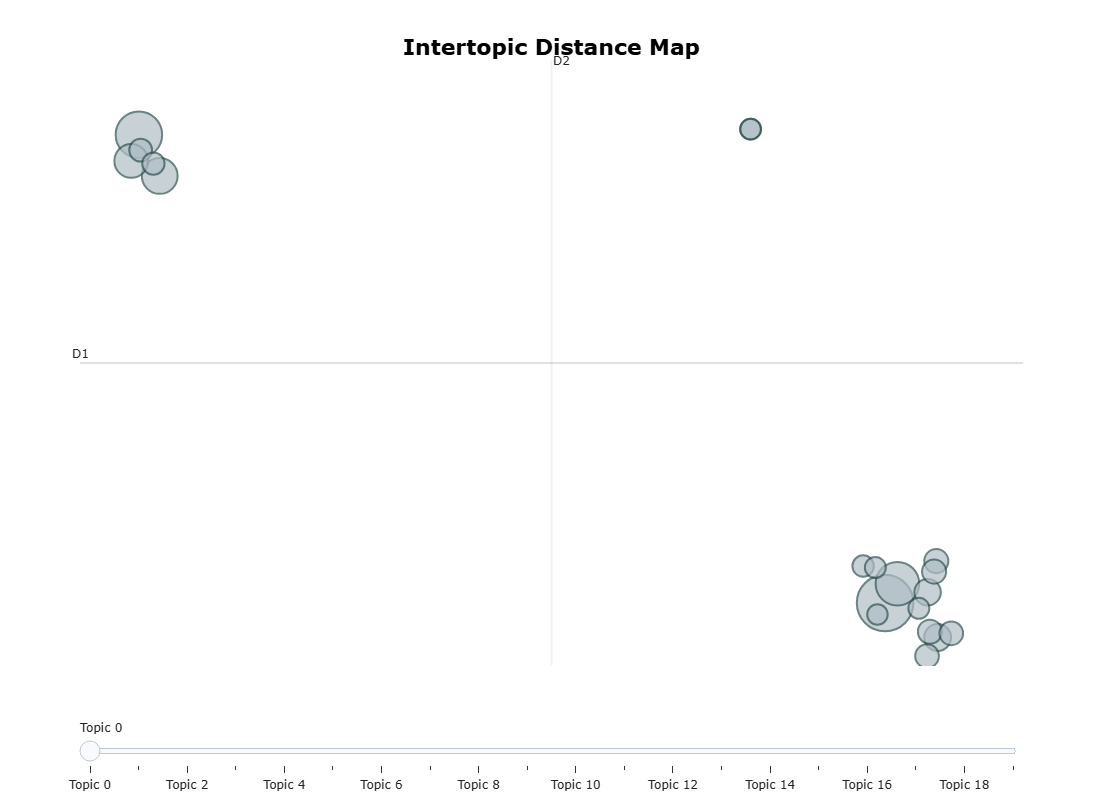

Tema 66: gusto haberlo conocido sola vez había escrito asesora inspiro decirle asesor duda mejor siga enseñando forma hizo mí lugar duda habría llegado concluir manera modulo ayuda honor haber sido alumna resp...
Tema 3: quisiera felicitar asesor virtual excelente desempeño módulo apoyo sido invaluable brindando respuestas claras precisas preguntas forma facilitado aprendizaje dedicación asegurar entienda cada concept...
Tema 73: buena explicando fases toma tiempo explicar tranquilidad tenemos duda tiene actividades hacemos secciones divertidas entretenidas ¡es mejor asesora pudo tocar módulo asesora quiero agradecer cada retr...
Tema 0: asesor empático conocedor temas trabajan módulo tardes estimado asesor virtual isidro gonzález vázquez escribo agradecerle tiempo dedicación hacia mí grupo asignado hecho paso último módulo 23 24 cont...
Tema -1: hizo trabajo enseñando escribiendo retroalimentaciónes asesora virtual primero nada esperando encuntre tenga fin semana reconozco sabe explic

In [11]:
import pandas as pd
import re
import string
from bertopic import BERTopic

# 1. Cargar datos
df = pd.read_excel('datos_combinados.xlsx')

# 2. Funciones de limpieza
def limpiar_espacios(texto):
    return re.sub(r'\s+', ' ', texto)

def eliminar_puntuacion(texto):
    return texto.translate(str.maketrans('', '', string.punctuation))

def eliminar_stopwords(texto, stopwords):
    palabras = texto.split()
    palabras_filtradas = [pal for pal in palabras if pal not in stopwords]
    return ' '.join(palabras_filtradas)

# 3. Lista personalizada de stopwords (en minúsculas)
stopwords_personalizadas = set([
    'que', 'y', 'de', 'la', 'el', 'en', 'los', 'las', 'un', 'una', 'con', 'por', 'para',
    'es', 'al', 'del', 'se', 'lo', 'su', 'más', 'pero', 'no', 'muy', 'como', 'le', 'ha',
    'me', 'si', 'o', 'ya', 'todo', 'también', 'muy', 'sin', 'sobre', 'este', 'esta',
    'son', 'fue', 'ser', 'han', 'sus', 'gracias', 'mi', 'mucho', 'mis', 'nos', 'muchas', 
    'siempre', 'bien', 'agradezco', 'buenas', 'gran','usted', 'mas', 'así', 'e', 'a'
])

# 4. Limpiar columnas 'Felicitaciones' y 'Sugerencias'
for col in ['Felicitaciones', 'Sugerencias']:
    df[col] = df[col].fillna('').astype(str)  # Manejar nulos y asegurar strings
    df[col] = df[col].str.replace('-', ' ', regex=False)  # Reemplazar guiones por espacio
    df[col] = df[col].str.strip()  # Quitar espacios al inicio y final
    df[col] = df[col].str.lower()  # Convertir a minúsculas
    df[col] = df[col].apply(limpiar_espacios)  # Unificar espacios
    df[col] = df[col].apply(eliminar_puntuacion)  # Eliminar puntuación
    df[col] = df[col].apply(lambda texto: eliminar_stopwords(texto, stopwords_personalizadas))  # Eliminar stopwords

# 5. Filtrar textos vacíos o muy cortos en 'Felicitaciones' (menos de 10 caracteres)
df = df[df['Felicitaciones'].str.len() > 10].copy()

# 6. Truncar textos muy largos para evitar problemas con BERT (más de 1000 caracteres)
df['Felicitaciones'] = df['Felicitaciones'].apply(lambda x: x[:1000])

# 7. Extraer lista de comentarios limpios para 'Felicitaciones'
comentarios = df['Felicitaciones'].tolist()

# 8. Crear y entrenar modelo BERTopic
modelo = BERTopic(language="multilingual", calculate_probabilities=True, min_topic_size=3, verbose=True)
temas, probabilidades = modelo.fit_transform(comentarios)

# 9. Mostrar información de temas
print(modelo.get_topic_info())

# 10. Visualizar los 20 temas más relevantes
fig = modelo.visualize_topics(top_n_topics=20, width=1200, height=800)
fig.show()

# 11. Asignar temas al DataFrame para análisis posterior
df['Tema_Felicitaciones'] = temas

# 12. Mostrar algunos ejemplos con tema asignado
for i in range(min(10, len(df))):
    print(f"Tema {df['Tema_Felicitaciones'].iloc[i]}: {df['Felicitaciones'].iloc[i][:200]}...")


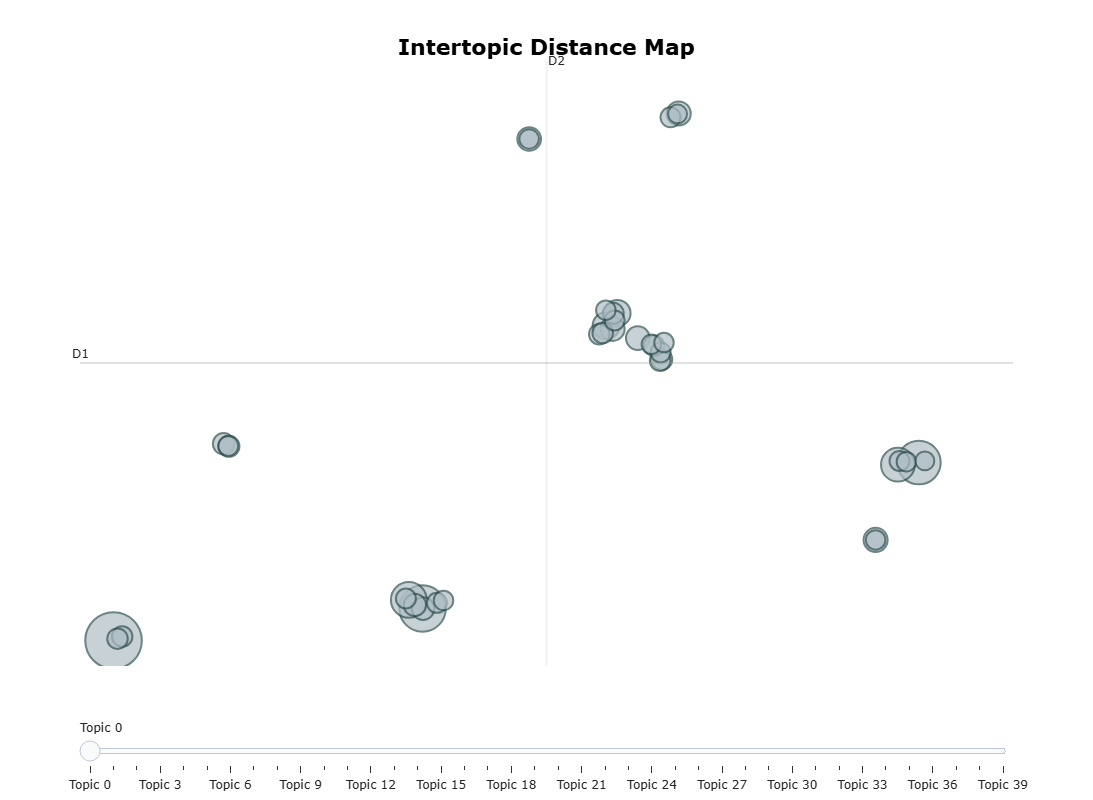

In [15]:
# 10. Visualizar los 20 temas más relevantes
fig = modelo.visualize_topics(top_n_topics=40, width=1200-200, height=800)
fig.show()

## Análisis exploratorio del tema -1 (ruido)

In [16]:
docs_tema_neg1 = [doc for doc, tema in zip(comentarios, temas) if tema == -1]
print(f"Cantidad documentos en tema -1: {len(docs_tema_neg1)}")
print("Ejemplos:")
for d in docs_tema_neg1[:5]:
    print("-", d[:200])


Cantidad documentos en tema -1: 3559
Ejemplos:
- hizo trabajo enseñando escribiendo retroalimentaciónes asesora virtual primero nada esperando encuntre tenga fin semana reconozco sabe explicar detalle actividades realizar compañeros tambien tratara 
- extenciones te otorga solo eran 4 3 horas hola asesor felicidades explica pense seria complicado sesiones explicaciones pude terminar ultimo módulogracias retroalimentaciones tenga excelente día parer
- pues apoyo brindado asesor quiero felicitarlo trabajo hace enseñando todos conocimientos asesor duda maestro hace mejorar enseña manera excelente trabajo realiza excelente duda hace podamos desarrolla
- excelente asesor únicamente agradecerlo totalmente asesor empeño actividades retroalimentación proporciona mucha utilidad mí igual apoyo brindado felicidades asesor maestro ge¡ran asesor apoyo nuestra
- mejores asesores he tenido durante todos estos modulos excelente asesora comprometido trabajo explicaciones durante sesiones virtuales ayud

# Código para ajustar el modelo y segmentar textos largos (el bueno, funciona para Felicitaciones y sugerencias)

2025-06-26 01:14:43,760 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/204 [00:00<?, ?it/s]

2025-06-26 01:18:20,317 - BERTopic - Embedding - Completed ✓
2025-06-26 01:18:20,319 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-06-26 01:18:33,400 - BERTopic - Dimensionality - Completed ✓
2025-06-26 01:18:33,413 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-26 01:18:35,608 - BERTopic - Cluster - Completed ✓
2025-06-26 01:18:35,615 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-26 01:18:35,984 - BERTopic - Representation - Completed ✓


    Topic  Count                                    Name  \
0      -1   3044      -1_actividades_asesor_asesora_solo   
1       0    385         0_video_videos_youtube_sesiones   
2       1    273      1_virtual_virtuales_asesor_asesora   
3       2    239              2_sea_poco_tan_actividades   
4       3    166                 3_siga_siendo_esa_hasta   
..    ...    ...                                     ...   
70     69     11        69_resuelve_clara_dudas_asesoras   
71     70     11  70_perfecto_ninguna_araujo_especifcios   
72     71     11   71_contesten_contestar_tratar_mejorar   
73     72     10     72_ayuda_plataforma_primeros_difcil   
74     73     10               73_mara_asesora_envi_siga   

                                       Representation  \
0   [actividades, asesor, asesora, solo, tiempo, t...   
1   [video, videos, youtube, sesiones, sesin, suge...   
2   [virtual, virtuales, asesor, asesora, tengo, e...   
3   [sea, poco, tan, actividades, claro, emptico, .

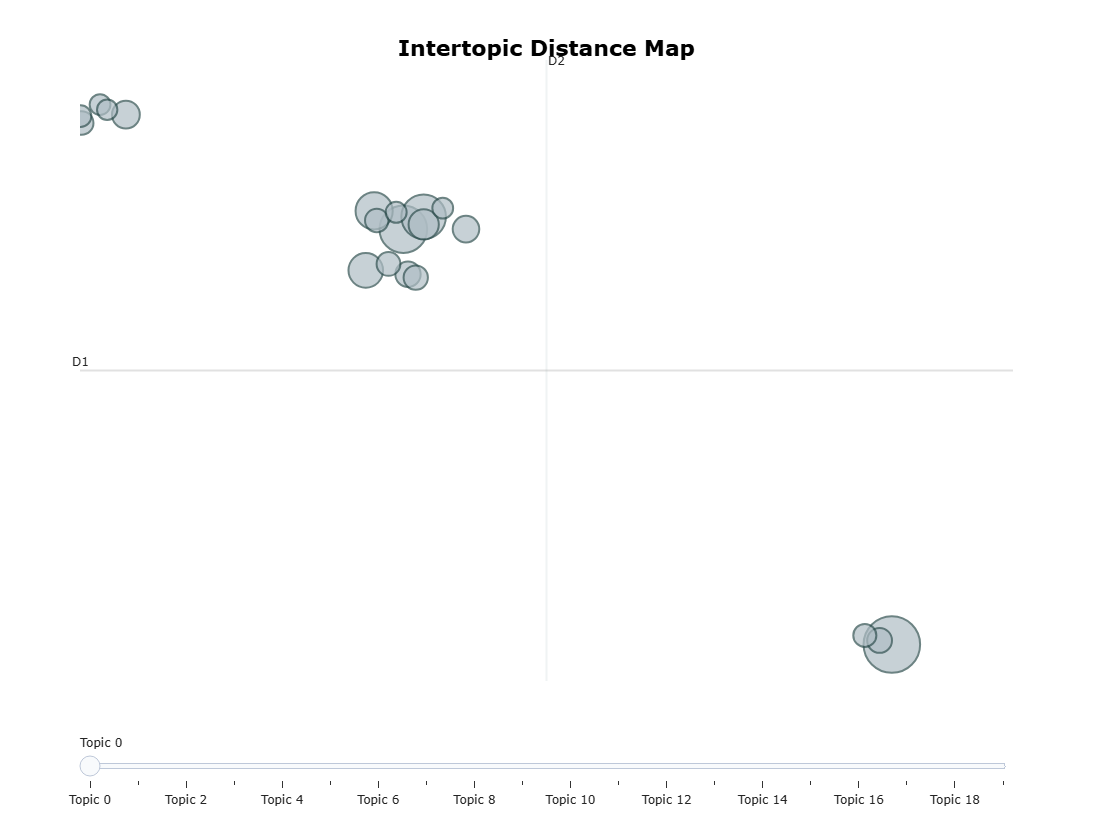

                                           fragmento  tema
0  hola buenos días asesor ángel castorena cabrer...     0
1  periodo enseño seguir adelante pesar adversida...     2
2  espero módulo sea aprendizaje estudiantes pued...     2
3  tengo sugerencias asesor estoy completamente a...    21
4  quiero agradecerle ayuda satisfecho hecho conc...    41
5  brinda buena atencion explicaciones hacia noso...    -1
6  excelente asesor gustó manera enseñar cosas ha...     4
7  tal sugerencia nada agradecerle apoyo brindado...    -1
8  estar nosotros te último módulo apoyo semana ú...    16
9           específicar puntos sesiones tratar claro    -1


In [24]:
import pandas as pd
import re
import string
from bertopic import BERTopic
from umap import UMAP
import hdbscan

# --- Funciones de limpieza (como antes) ---
def limpiar_espacios(texto):
    return re.sub(r'\s+', ' ', texto)

def eliminar_puntuacion(texto):
    return texto.translate(str.maketrans('', '', string.punctuation))

def eliminar_stopwords(texto, stopwords):
    palabras = texto.split()
    palabras_filtradas = [pal for pal in palabras if pal not in stopwords]
    return ' '.join(palabras_filtradas)

# --- Lista de stopwords personalizada ---
stopwords_personalizadas = set([
    'que', 'y', 'de', 'la', 'el', 'en', 'los', 'las', 'un', 'una', 'con', 'por', 'para',
    'es', 'al', 'del', 'se', 'lo', 'su', 'más', 'pero', 'no', 'muy', 'como', 'le', 'ha',
    'me', 'si', 'o', 'ya', 'todo', 'también', 'muy', 'sin', 'sobre', 'este', 'esta',
    'son', 'fue', 'ser', 'han', 'sus', 'gracias', 'mi', 'mucho', 'mis', 'nos', 'muchas', 
    'siempre', 'bien', 'agradezco', 'buenas', 'gran','usted', 'mas', 'así', 'e', 'a'
])

# --- Función para segmentar textos largos en fragmentos ---
def segmentar_textos(textos, max_longitud=500):
    fragmentos = []
    for texto in textos:
        # Dividir texto en fragmentos de max_longitud caracteres, sin cortar palabras
        start = 0
        while start < len(texto):
            end = start + max_longitud
            if end < len(texto):
                # Buscar último espacio antes de end para no cortar palabra
                espacio = texto.rfind(' ', start, end)
                if espacio == -1 or espacio <= start:
                    espacio = end
                fragmentos.append(texto[start:espacio].strip())
                start = espacio
            else:
                fragmentos.append(texto[start:].strip())
                break
    return fragmentos

# --- Cargar datos ---
df = pd.read_excel('datos_combinados 2024.xlsx')

# --- Limpiar columnas ---
for col in ['Felicitaciones', 'Sugerencias']:
    df[col] = df[col].fillna('').astype(str)
    df[col] = df[col].str.replace('-', ' ', regex=False)
    df[col] = df[col].str.strip()
    df[col] = df[col].str.lower()
    df[col] = df[col].apply(limpiar_espacios)
    df[col] = df[col].apply(eliminar_puntuacion)
    df[col] = df[col].apply(lambda texto: eliminar_stopwords(texto, stopwords_personalizadas))

# --- Filtrar textos cortos ---
df = df[df['Sugerencias'].str.len() > 10].copy()

# --- Segmentar textos largos ---
comentarios_segmentados = segmentar_textos(df['Sugerencias'].tolist(), max_longitud=500)

# --- Configurar UMAP y HDBSCAN para ajuste fino ---
umap_model = UMAP(n_neighbors=15, n_components=5, metric='cosine', random_state=42)
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=10, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

# --- Crear y entrenar modelo BERTopic con parámetros ajustados ---
modelo = BERTopic(
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    calculate_probabilities=True,
    min_topic_size=10,
    verbose=True
)

temas, probabilidades = modelo.fit_transform(comentarios_segmentados)

# --- Mostrar resumen de temas ---
print(modelo.get_topic_info())

# --- Visualizar temas principales ---
fig = modelo.visualize_topics(top_n_topics=20, width=1200, height=800)
fig.show()

# --- Opcional: asignar temas a fragmentos para análisis posterior ---
df_fragmentos = pd.DataFrame({'fragmento': comentarios_segmentados, 'tema': temas})
print(df_fragmentos.head(10))


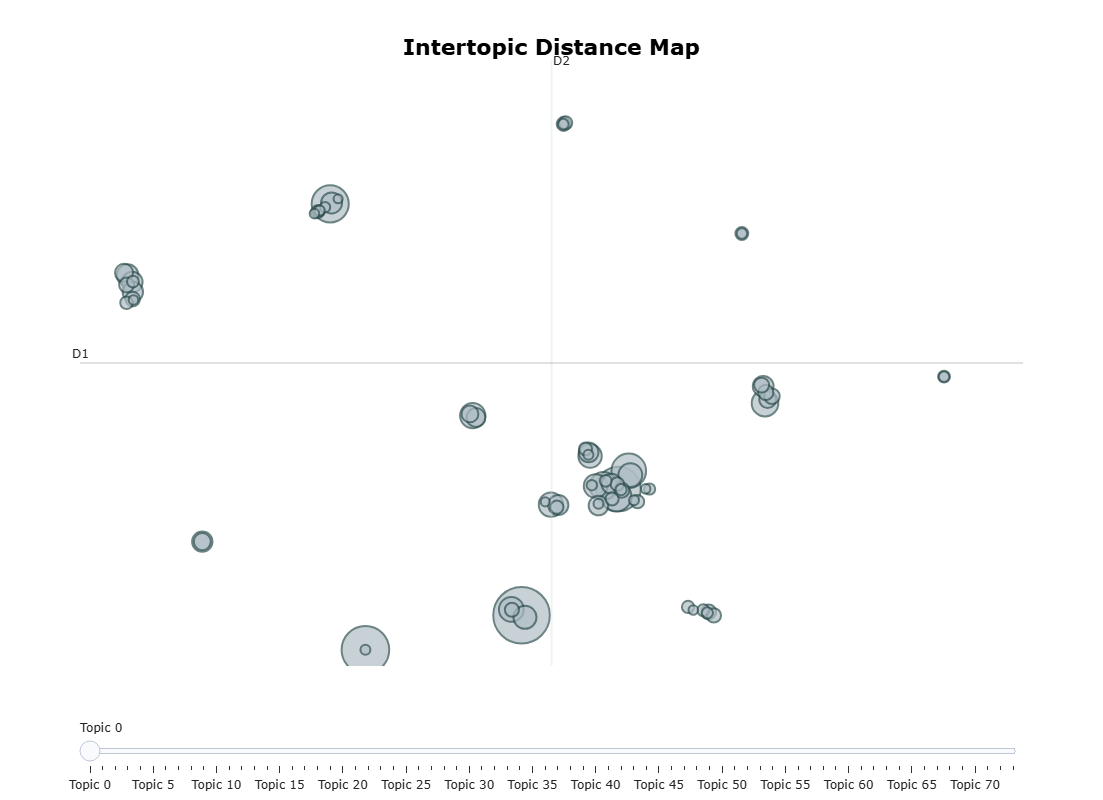

In [25]:
# --- Visualizar temas principales ---
fig = modelo.visualize_topics(top_n_topics=75, width=1200, height=800)
fig.show()

## Guardar en html

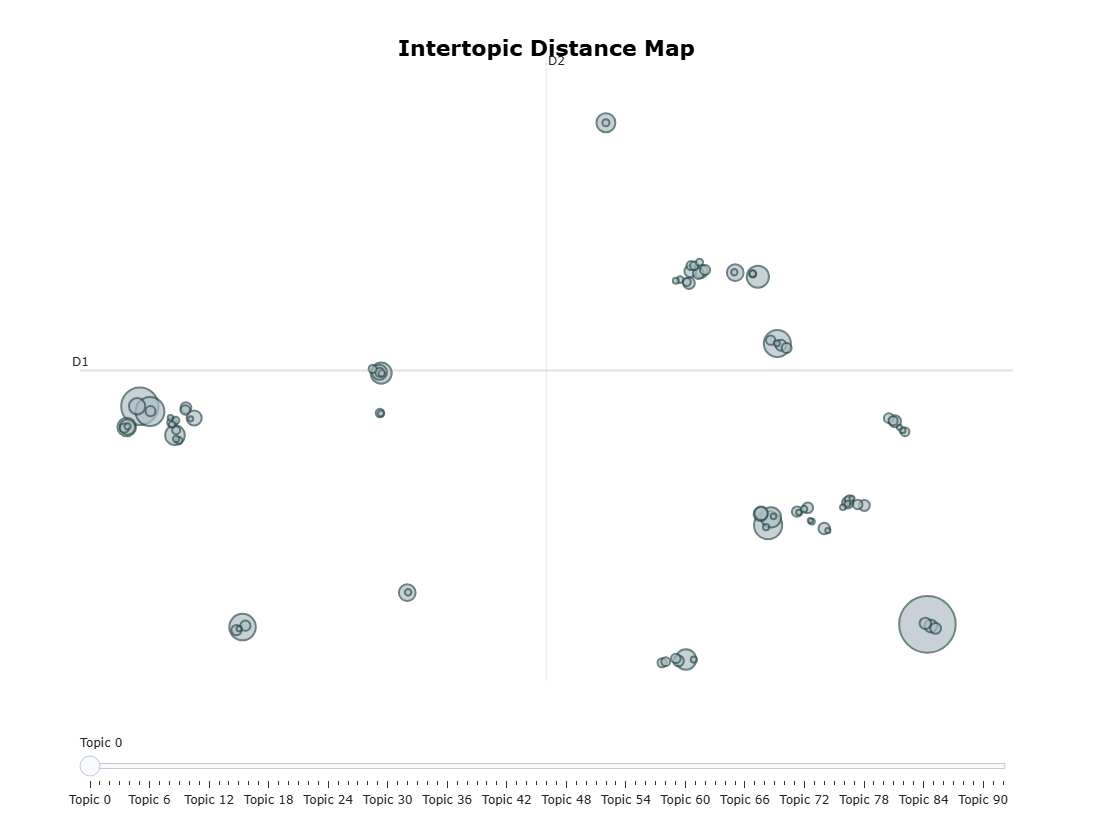

In [19]:
# Generar la figura interactiva con los 93 temas
fig = modelo.visualize_topics(top_n_topics=93, width=1200, height=800)

# Guardar la figura en un archivo HTML
fig.write_html("temas_bertopic.html")

# Opcional: mostrar la figura en pantalla
fig.show()

## Agregar notas al html

In [26]:
# Generar la figura interactiva con los 93 temas
fig = modelo.visualize_topics(top_n_topics=75, width=1200, height=800)

# Guardar la figura en un archivo HTML temporal
html_file = "temas_bertopic.html"
fig.write_html(html_file)

# Nota explicativa que quieres agregar
nota = """
<div style="font-family: Arial, sans-serif; margin: 20px; padding: 10px; border: 2px solid #444; border-radius: 8px; background-color: #f9f9f9;">
<h2>Significado de las burbujas en la visualización de temas</h2>
<ul>
<li><b>Las burbujas representan temas:</b> Cada burbuja es un tema identificado por el modelo, que agrupa documentos con contenido semántico similar.</li>
<li><b>Palabras dentro o cerca de las burbujas:</b> Son las palabras clave que caracterizan ese tema, extraídas mediante c-TF-IDF. Estas palabras resumen el contenido principal del tema y te ayudan a interpretarlo.</li>
<li><b>Tamaño de las burbujas:</b> Indica la cantidad de documentos asignados a ese tema. Una burbuja más grande significa que el tema es más frecuente o relevante en el corpus.</li>
<li><b>Superposición o proximidad entre burbujas:</b> Refleja la similitud semántica entre temas. Temas cuyos contenidos son parecidos aparecerán más cerca o incluso superpuestos, indicando que están relacionados o comparten vocabulario.</li>
<li><b>"Size 43" u otros números:</b> Generalmente indican el tamaño o peso del tema, es decir, cuántos documentos contiene o su importancia relativa dentro del conjunto de datos. Ese número ayuda a cuantificar visualmente la relevancia del tema.</li>
</ul>
</div>
"""

# Leer el contenido del archivo HTML generado
with open(html_file, 'r', encoding='utf-8') as file:
    html_content = file.read()

# Insertar la nota justo después de la etiqueta <body> para que aparezca arriba
html_content = html_content.replace(
    "<body>",
    f"<body>\n{nota}\n"
)

# Guardar el archivo HTML modificado
with open("temas_bertopic_con_nota.html", 'w', encoding='utf-8') as file:
    file.write(html_content)

print("Archivo 'temas_bertopic_con_nota.html' generado con la nota explicativa.")


Archivo 'temas_bertopic_con_nota.html' generado con la nota explicativa.


## Mejorado con boton

In [22]:
import json
from collections import defaultdict

# --- Agrupar textos por tema ---
texts_by_topic = defaultdict(list)
for texto, tema in zip(comentarios_segmentados, temas):
    texts_by_topic[str(tema)].append(texto)  # clave como string para JS

texts_by_topic_json = json.dumps(texts_by_topic, ensure_ascii=False)

# --- Generar la figura de la visualización ---
fig = modelo.visualize_topics(top_n_topics=len(modelo.get_topic_info()) - 1, width=1200, height=800)

# --- Guardar la figura en un archivo HTML temporal ---
html_file = "temas_bertopic.html"
fig.write_html(html_file)

# --- Nota explicativa ---
nota_html = """
<div style="font-family: Arial, sans-serif; margin: 20px; padding: 10px; border: 2px solid #444; border-radius: 8px; background-color: #f9f9f9;">
<h2>Significado de las burbujas en la visualización de temas</h2>
<ul>
<li><b>Las burbujas representan temas:</b> Cada burbuja es un tema identificado por el modelo, que agrupa documentos con contenido semántico similar.</li>
<li><b>Palabras dentro o cerca de las burbujas:</b> Son las palabras clave que caracterizan ese tema, extraídas mediante c-TF-IDF. Estas palabras resumen el contenido principal del tema y te ayudan a interpretarlo.</li>
<li><b>Tamaño de las burbujas:</b> Indica la cantidad de documentos asignados a ese tema. Una burbuja más grande significa que el tema es más frecuente o relevante en el corpus.</li>
<li><b>Superposición o proximidad entre burbujas:</b> Refleja la similitud semántica entre temas. Temas cuyos contenidos son parecidos aparecerán más cerca o incluso superpuestos, indicando que están relacionados o comparten vocabulario.</li>
<li><b>"Size 43" u otros números:</b> Indican el tamaño o peso del tema, es decir, cuántos documentos contiene o su importancia relativa dentro del conjunto de datos.</li>
</ul>
</div>
"""

# --- Código JS para interacción ---
js_script = f"""
<script>
  const textsByTopic = {texts_by_topic_json};
  let selectedTopic = null;

  const container = document.createElement('div');
  container.style.margin = '20px';

  const btn = document.createElement('button');
  btn.id = 'showTextsBtn';
  btn.textContent = 'Selecciona un tema haciendo clic en una burbuja';
  btn.style.padding = '10px 20px';
  btn.style.fontSize = '16px';
  btn.style.cursor = 'not-allowed';
  btn.disabled = true;

  const textsContainer = document.createElement('div');
  textsContainer.id = 'textsContainer';
  textsContainer.style.maxHeight = '300px';
  textsContainer.style.overflowY = 'auto';
  textsContainer.style.border = '1px solid #ccc';
  textsContainer.style.padding = '10px';
  textsContainer.style.marginTop = '10px';
  textsContainer.style.whiteSpace = 'pre-wrap';
  textsContainer.style.fontFamily = 'Arial, sans-serif';
  textsContainer.style.backgroundColor = '#fefefe';

  container.appendChild(btn);
  container.appendChild(textsContainer);

  document.body.insertBefore(container, document.body.firstChild);

  const graphDiv = document.querySelector('div.js-plotly-plot');

  graphDiv.on('plotly_click', function(data) {{
    if(data.points.length > 0){{
      const fullText = data.points[0].text;
      const topicId = fullText.split('_')[0];
      selectedTopic = topicId;

      btn.textContent = `Mostrar textos del tema ${{selectedTopic}}`;
      btn.disabled = false;
      btn.style.cursor = 'pointer';

      textsContainer.innerHTML = '';
    }}
  }});

  btn.addEventListener('click', function(){{
    if(selectedTopic === null){{
      textsContainer.innerHTML = '<i>Selecciona primero un tema haciendo clic en una burbuja.</i>';
      return;
    }}
    const textos = textsByTopic[selectedTopic];
    if(!textos || textos.length === 0){{
      textsContainer.innerHTML = '<i>No hay textos para este tema.</i>';
      return;
    }}
    const maxToShow = 20;
    textsContainer.innerHTML = '';
    textos.slice(0, maxToShow).forEach((t, i) => {{
      const p = document.createElement('p');
      p.textContent = `${{i+1}}. ${{t}}`;
      textsContainer.appendChild(p);
    }});
    if(textos.length > maxToShow){{
      const more = document.createElement('p');
      more.style.fontStyle = 'italic';
      more.textContent = `... y ${{textos.length - maxToShow}} textos más.`;
      textsContainer.appendChild(more);
    }}
  }});
</script>
"""


# --- Leer el HTML generado ---
with open(html_file, 'r', encoding='utf-8') as f:
    html_content = f.read()

# --- Insertar la nota y el script justo después de <body> ---
html_content = html_content.replace(
    "<body>",
    f"<body>\n{nota_html}\n{js_script}\n"
)

# --- Guardar el archivo final ---
output_file = "temas_bertopic_interactivo.html"
with open(output_file, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Archivo HTML interactivo generado: {output_file}")


Archivo HTML interactivo generado: temas_bertopic_interactivo.html


## Solo topicos y textos

In [27]:
import json

# Supongamos que tienes dos listas:
# comentarios_segmentados: lista de textos segmentados
# temas: lista de IDs de tema asignados a cada texto (misma longitud que comentarios_segmentados)

# Agrupar textos por tema
from collections import defaultdict
texts_by_topic = defaultdict(list)
for texto, tema in zip(comentarios_segmentados, temas):
    texts_by_topic[str(tema)].append(texto)

# Convertir a JSON para insertar en HTML
texts_by_topic_json = json.dumps(texts_by_topic, ensure_ascii=False)

# Plantilla HTML básica con selector y área para mostrar textos
html_template = f"""
<!DOCTYPE html>
<html lang="es">
<head>
<meta charset="UTF-8" />
<title>Visualizador de Textos por Tópico</title>
<style>
  body {{ font-family: Arial, sans-serif; margin: 20px; }}
  #textsContainer {{ margin-top: 20px; max-height: 400px; overflow-y: auto; border: 1px solid #ccc; padding: 10px; background: #f9f9f9; white-space: pre-wrap; }}
</style>
</head>
<body>

<h2>Selecciona un tópico para ver sus textos</h2>

<select id="topicSelect">
  <option value="">-- Selecciona un tópico --</option>
</select>

<div id="textsContainer">Aquí se mostrarán los textos del tópico seleccionado.</div>

<script>
const textsByTopic = {texts_by_topic_json};

const select = document.getElementById('topicSelect');
const container = document.getElementById('textsContainer');

// Cargar opciones en el selector
for (const topicId in textsByTopic) {{
  const option = document.createElement('option');
  option.value = topicId;
  option.textContent = `Tópico ${{topicId}} (${{textsByTopic[topicId].length}} textos)`;
  select.appendChild(option);
}}

// Mostrar textos al seleccionar un tópico
select.addEventListener('change', () => {{
  const selected = select.value;
  container.innerHTML = '';
  if (!selected || !textsByTopic[selected]) {{
    container.textContent = 'Aquí se mostrarán los textos del tópico seleccionado.';
    return;
  }}
  textsByTopic[selected].forEach((texto, i) => {{
    const p = document.createElement('p');
    p.textContent = `${{i + 1}}. ${{texto}}`;
    container.appendChild(p);
  }});
}});
</script>

</body>
</html>
"""

# Guardar el HTML en un archivo
with open("visualizador_temas.html", "w", encoding="utf-8") as f:
    f.write(html_template)

print("Archivo 'visualizador_temas.html' generado. Ábrelo en un navegador para usarlo.")


Archivo 'visualizador_temas.html' generado. Ábrelo en un navegador para usarlo.


# Analisis tematico de un solo modulo (14)

In [1]:
import pandas as pd
import re
import string
from bertopic import BERTopic
from umap import UMAP
import hdbscan
import time

inicio = time.time()

# --- Funciones de limpieza ---
def limpiar_espacios(texto):
    return re.sub(r'\s+', ' ', texto)

def eliminar_puntuacion(texto):
    return texto.translate(str.maketrans('', '', string.punctuation))

def eliminar_stopwords(texto, stopwords):
    palabras = texto.split()
    palabras_filtradas = [pal for pal in palabras if pal not in stopwords]
    return ' '.join(palabras_filtradas)

# --- Lista de stopwords personalizada ---
stopwords_personalizadas = set([
    'que', 'y', 'de', 'la', 'el', 'en', 'los', 'las', 'un', 'una', 'con', 'por', 'para',
    'es', 'al', 'del', 'se', 'lo', 'su', 'más', 'pero', 'no', 'muy', 'como', 'le', 'ha',
    'me', 'si', 'o', 'ya', 'todo', 'también', 'muy', 'sin', 'sobre', 'este', 'esta',
    'son', 'fue', 'ser', 'han', 'sus', 'gracias', 'mi', 'mucho', 'mis', 'nos', 'muchas', 
    'siempre', 'bien', 'agradezco', 'buenas', 'gran','usted', 'mas', 'así', 'e', 'a'
])

# --- Función para segmentar textos largos en fragmentos ---
def segmentar_textos(textos, max_longitud=500):
    fragmentos = []
    for texto in textos:
        start = 0
        while start < len(texto):
            end = start + max_longitud
            if end < len(texto):
                espacio = texto.rfind(' ', start, end)
                if espacio == -1 or espacio <= start:
                    espacio = end
                fragmentos.append(texto[start:espacio].strip())
                start = espacio
            else:
                fragmentos.append(texto[start:].strip())
                break
    return fragmentos

# --- Cargar datos ---
df = pd.read_excel('datos_combinados 2024.xlsx')

# --- Filtrar por módulo específico (ejemplo: M14) ---
modulo_a_analizar = "M14"  # Cambia esto al módulo que necesites (ej: "M23", "M05", etc.)
df = df[df['Grupo'].str.contains(f"{modulo_a_analizar}C", na=False)].copy()  # Filtra filas donde 'Grupo' contiene "M14C"

# --- Limpiar columnas ---
for col in ['Felicitaciones', 'Sugerencias']:
    df[col] = df[col].fillna('').astype(str)
    df[col] = df[col].str.replace('-', ' ', regex=False)
    df[col] = df[col].str.strip()
    df[col] = df[col].str.lower()
    df[col] = df[col].apply(limpiar_espacios)
    df[col] = df[col].apply(eliminar_puntuacion)
    df[col] = df[col].apply(lambda texto: eliminar_stopwords(texto, stopwords_personalizadas))

# --- Filtrar textos cortos ---
df = df[df['Sugerencias'].str.len() > 10].copy()

# --- Segmentar textos largos ---
comentarios_segmentados = segmentar_textos(df['Sugerencias'].tolist(), max_longitud=500)

# --- Configurar UMAP y HDBSCAN ---
umap_model = UMAP(n_neighbors=15, n_components=5, metric='cosine', random_state=42)
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=10, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

# --- Crear y entrenar modelo BERTopic ---
modelo = BERTopic(
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    calculate_probabilities=True,
    min_topic_size=10,
    verbose=True
)

temas, probabilidades = modelo.fit_transform(comentarios_segmentados)

# --- Mostrar resumen de temas ---
print(f"Análisis para el módulo {modulo_a_analizar}:")
print(modelo.get_topic_info())


fin = time.time()

print(f"Tiempo de ejecución: {fin - inicio} segundos")

2025-07-10 11:41:47,242 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/25 [00:00<?, ?it/s]

2025-07-10 11:43:07,325 - BERTopic - Embedding - Completed ✓
2025-07-10 11:43:07,326 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-07-10 11:43:31,278 - BERTopic - Dimensionality - Completed ✓
2025-07-10 11:43:31,315 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-07-10 11:43:31,509 - BERTopic - Cluster - Completed ✓
2025-07-10 11:43:31,526 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-07-10 11:43:31,653 - BERTopic - Representation - Completed ✓


Análisis para el módulo M14:
    Topic  Count                                               Name  \
0      -1    334                 -1_actividades_asesora_tiempo_poco   
1       0     77                 0_excelente_trabajo_ninguna_asesor   
2       1     66               1_tiempo_tenemos_actividades_trabajo   
3       2     60                2_video_sesiones_videos_actividades   
4       3     48           3_actividades_calificacin_actividad_solo   
5       4     41        4_plagio_referencias_actividades_informacin   
6       5     32                 5_sea_actividades_esfuerzo_emptica   
7       6     29                     6_virtual_virtuales_gustara_qu   
8       7     23             7_realizar_actividad_actividades_mejor   
9       8     19                    8_rbrica_pues_rubrica_calificar   
10      9     14  9_retroalimentaciones_retroalimentacin_mejorar...   
11     10     13         10_actividades_integradoras_quiso_ejemplos   
12     11     12             11_correo_electrnic

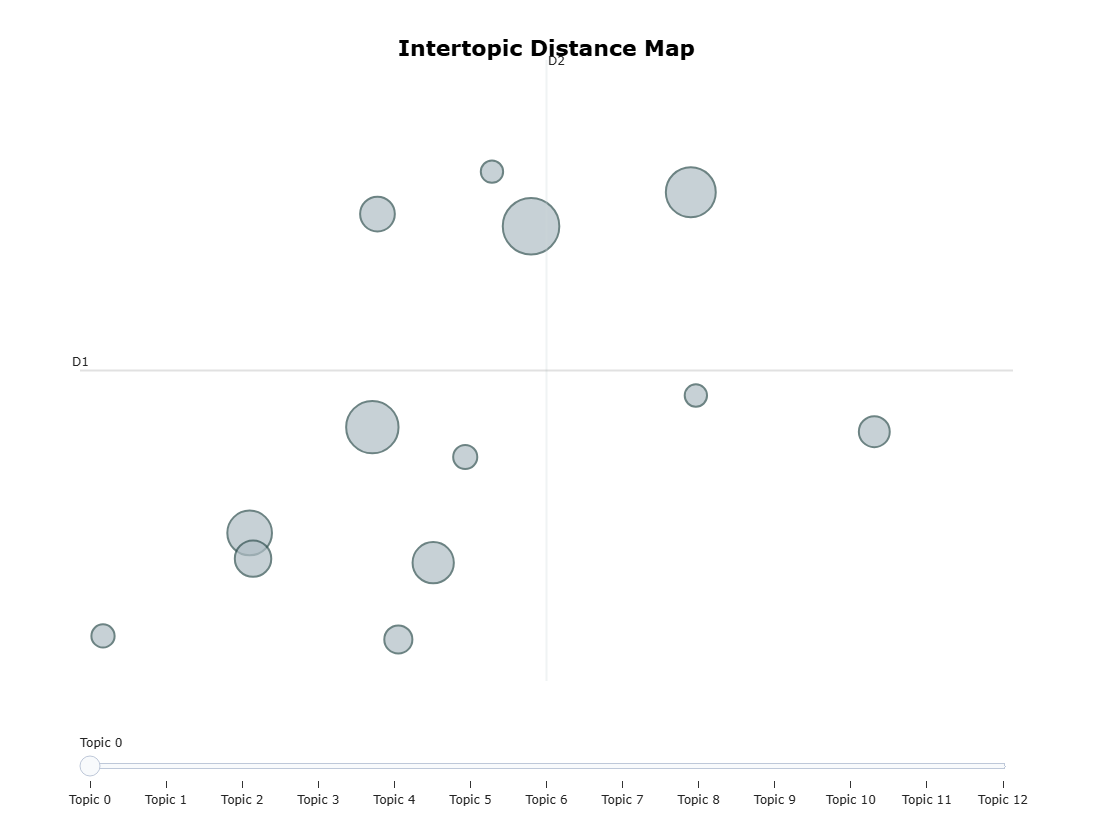

In [6]:
# Generar la figura interactiva con los n temas
fig = modelo.visualize_topics(width=1200, height=800)

# Guardar la figura en un archivo HTML
fig.write_html("temas_bertopic_M14.html")

# Opcional: mostrar la figura en pantalla
fig.show()

In [7]:
# --- Opcional: asignar temas a fragmentos ---
df_fragmentos = pd.DataFrame({'fragmento': comentarios_segmentados, 'tema': temas})
print(df_fragmentos.head(10))

                                           fragmento  tema
0  general considero hay nada qué cambiar asesora...     2
1  estimada asesora virtual primer lugar deseo ex...    -1
2  información previa está establecida vuelve com...    -1
3  tengo dificultades recordar mayoría detalles r...     6
4  hacia comentario atentamente mariana l asesora...     3
5  mí estaría mejor diera confianza alumnos pregu...     5
6    siga haciendo excelente trabajo pongan recursos     0
7  siga mandado ligas recursos ayuden cuando hace...    11
8      leyera comentarios dejó actividades mensajero    10
9  aunque explica pienso debería hacer ejemplo pa...     5


## Analis exploratorio de temas identificados

In [9]:
# Obtener información de los temas
topic_info = modelo.get_topic_info()

# Mostrar resumen
print(f"📊 Total de temas identificados: {len(topic_info) - 1}")  # Restamos el tema -1 (outliers)
#print(f"📝 Documentos analizados: {len(df_modulo)}")
print(f"🔍 Tamaño promedio de clusters: {topic_info[1:]['Count'].mean():.1f} documentos")

# Top 5 temas más frecuentes
print("\n🎯 Top 5 temas por frecuencia:")
print(topic_info[1:14][['Topic', 'Count', 'Name']])

📊 Total de temas identificados: 13
🔍 Tamaño promedio de clusters: 34.3 documentos

🎯 Top 5 temas por frecuencia:
    Topic  Count                                               Name
1       0     77                 0_excelente_trabajo_ninguna_asesor
2       1     66               1_tiempo_tenemos_actividades_trabajo
3       2     60                2_video_sesiones_videos_actividades
4       3     48           3_actividades_calificacin_actividad_solo
5       4     41        4_plagio_referencias_actividades_informacin
6       5     32                 5_sea_actividades_esfuerzo_emptica
7       6     29                     6_virtual_virtuales_gustara_qu
8       7     23             7_realizar_actividad_actividades_mejor
9       8     19                    8_rbrica_pues_rubrica_calificar
10      9     14  9_retroalimentaciones_retroalimentacin_mejorar...
11     10     13         10_actividades_integradoras_quiso_ejemplos
12     11     12             11_correo_electrnico_internet_extensin
13 

## Grafico de gerarquia de temas (Para entender relaciones)

In [54]:
# Visualizar jerarquía de temas
fig_hierarchy = modelo.visualize_hierarchy(
    width=800+200,
    height=600+200,
    title=f"Jerarquía de Temas (Módulo {MODULO})"
)
fig_hierarchy.show()

## Heatmap de Similitud (Para comparar temas)

In [36]:
fig_heatmap = modelo.visualize_heatmap(
    width=900,
    height=700,
    title=f"Similitud entre Temas (Módulo {MODULO})"
)
fig_heatmap.show()

## Gráfico de Barras Interactivo (Para frecuencia y palabras clave)

In [37]:
fig_barchart = modelo.visualize_barchart(
    top_n_topics=10,
    width=1000,
    height=500,
    title=f"Palabras Clave por Tema (Módulo {MODULO})"
)
fig_barchart.show()

## Análisis por Tema Específico

In [52]:
tema_id = 12  # Cambia al tema que quieras analizar

# 1. Obtener palabras clave del tema
palabras_clave = modelo.get_topic(tema_id)
print(f"\n🔍 Tema {tema_id} - Palabras clave:")
print(palabras_clave[:10])  # Top 5 palabras

# 2. Filtrar documentos del tema (asegurando compatibilidad de índices)
if len(temas) == len(df_modulo):
    docs_tema = df_modulo.loc[temas == tema_id, 'Sugerencias'].tolist()
else:
    # Si hay segmentación de textos, usa el DataFrame de fragmentos
    docs_tema = df_fragmentos[df_fragmentos['tema'] == tema_id]['fragmento'].tolist()

# 3. Mostrar ejemplos
print("\n📄 Ejemplo de documentos:")
for doc in docs_tema[:12]:
    print(f"- {doc[:200]}..." if len(doc) > 200 else f"- {doc}")


🔍 Tema 12 - Palabras clave:
[('soy', np.float64(0.034332020936989796)), ('tiempo', np.float64(0.03294723533363585)), ('abiertos', np.float64(0.02923117029845405)), ('espacios', np.float64(0.02799905455934763)), ('contesta', np.float64(0.027850969338505553)), ('eso', np.float64(0.02711112653992931)), ('mayora', np.float64(0.026521960428006544)), ('dudas', np.float64(0.025893044047136254)), ('tener', np.float64(0.025496744833654644)), ('compaeros', np.float64(0.024500778296572736))]

📄 Ejemplo de documentos:
- compañeros pasan situaciones dificiles yo solo pediria mayor apertura criterio evaluaciones saludos
- hubiera gustado respetara horarios establecidos eso preguntan hoario ahi determina asesor horario tendria afluencia tanto imagino ella escogio horarios viernes 8 am casi tenia alumnos mismo varios com...
- tomara poco tiempo hacer clase tal manera vallamos resolviendo actividades mismo tiempo generar dudas solo habla hace resolvamos actividades reitero dura evaluar complicado trab

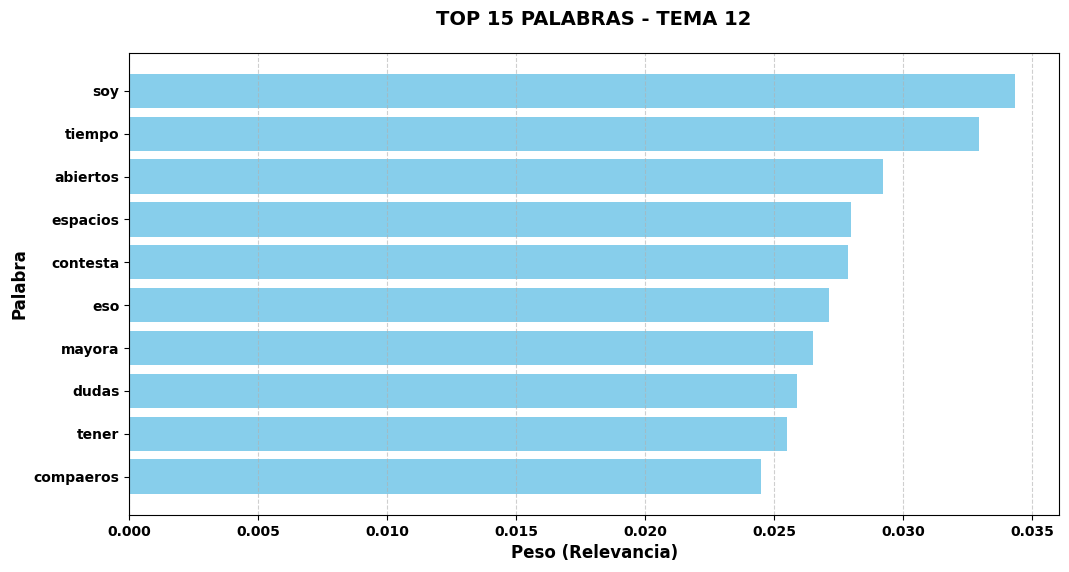

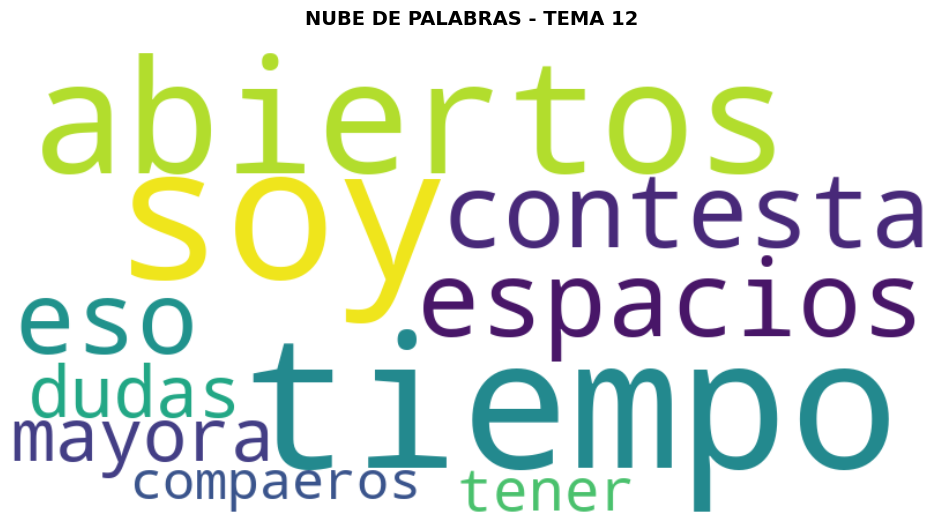


🔍 Tema 12 - Palabras clave (Top 5):
[('soy', np.float64(0.034332020936989796)), ('tiempo', np.float64(0.03294723533363585)), ('abiertos', np.float64(0.02923117029845405)), ('espacios', np.float64(0.02799905455934763)), ('contesta', np.float64(0.027850969338505553))]

📄 Ejemplo de documentos (primeros 12):
- compañeros pasan situaciones dificiles yo solo pediria mayor apertura criterio evaluaciones saludos
- hubiera gustado respetara horarios establecidos eso preguntan hoario ahi determina asesor horario tendria afluencia tanto imagino ella escogio horarios viernes 8 am casi tenia alumnos mismo varios com...
- tomara poco tiempo hacer clase tal manera vallamos resolviendo actividades mismo tiempo generar dudas solo habla hace resolvamos actividades reitero dura evaluar complicado trabajar buena asesora expl...
- dirijo asesora virtual martha patricia sólo pediría cambie especial tiene carisma tengo necesidad hacerle sugerencias pues acertada nota capacitada hice pregunta espacio abiert

In [53]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

tema_id = 12  # Cambia al tema que quieras analizar

# 1. Obtener palabras clave del tema (top 15)
palabras_clave = modelo.get_topic(tema_id)
top_palabras = palabras_clave[:15]  # Selecciona las 15 palabras más relevantes

# --- Gráfico de barras para el top 15 ---
plt.figure(figsize=(12, 6))
palabras = [palabra for palabra, peso in top_palabras]
pesos = [peso for palabra, peso in top_palabras]
plt.barh(palabras, pesos, color='skyblue')
plt.title(f'TOP 15 PALABRAS - TEMA {tema_id}', fontsize=14, pad=20)
plt.xlabel('Peso (Relevancia)', fontsize=12)
plt.ylabel('Palabra', fontsize=12)
plt.gca().invert_yaxis()  # Invertir eje Y para mostrar la palabra más relevante arriba
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# --- Nube de palabras ---
# Crear diccionario de palabras y pesos
frecuencias = {palabra: peso for palabra, peso in top_palabras}

# Generar nube de palabras
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=50
).generate_from_frequencies(frecuencias)

# Mostrar nube
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'NUBE DE PALABRAS - TEMA {tema_id}', fontsize=14, pad=20)
plt.show()

# --- Resto del análisis original ---
print(f"\n🔍 Tema {tema_id} - Palabras clave (Top 5):")
print(palabras_clave[:5])  # Top 5 palabras

# 2. Filtrar documentos del tema
if len(temas) == len(df_modulo):
    docs_tema = df_modulo.loc[temas == tema_id, 'Sugerencias'].tolist()
else:
    docs_tema = df_fragmentos[df_fragmentos['tema'] == tema_id]['fragmento'].tolist()

# 3. Mostrar ejemplos de documentos
print("\n📄 Ejemplo de documentos (primeros 12):")
for doc in docs_tema[:12]:
    print(f"- {doc[:200]}..." if len(doc) > 200 else f"- {doc}")

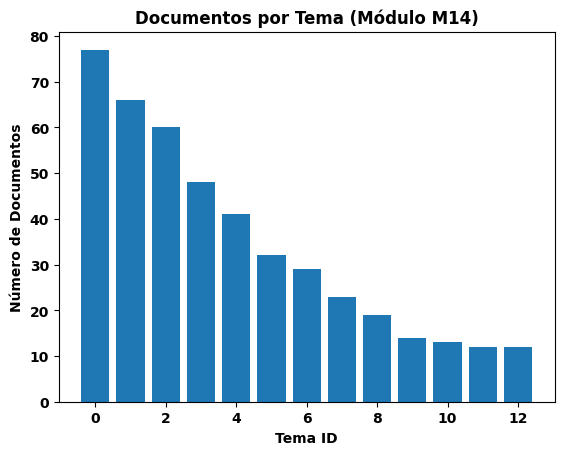

In [42]:
# Opción A: Si hay temas válidos (no solo -1)
if isinstance(temas, (np.ndarray, list)):
    temas_validos = [t for t in temas if t != -1]  # Excluye outliers
    if len(temas_validos) > 0:
        counts = [sum(np.array(temas) == i) for i in range(max(temas)+1)]
        plt.bar(range(max(temas)+1), counts)
        plt.title(f"Documentos por Tema (Módulo {MODULO})")
        plt.xlabel("Tema ID")
        plt.ylabel("Número de Documentos")
        plt.show()
    else:
        print("⚠️ Todos los documentos son outliers (tema -1). Revisa los parámetros de clustering.")

# Opción B: Si `temas` es booleano (error crítico)
else:
    print("❌ Error: 'temas' no contiene IDs de temas. Revisa el modelo BERTopic.")

# Análisis Temático + Clusterización para el Módulo 14

2025-07-08 19:16:56,909 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/17 [00:00<?, ?it/s]

2025-07-08 19:17:43,836 - BERTopic - Embedding - Completed ✓
2025-07-08 19:17:43,837 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-07-08 19:17:46,019 - BERTopic - Dimensionality - Completed ✓
2025-07-08 19:17:46,021 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-07-08 19:17:46,143 - BERTopic - Cluster - Completed ✓
2025-07-08 19:17:46,154 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-07-08 19:17:46,243 - BERTopic - Representation - Completed ✓


Resumen de temas identificados:
   Topic  Count                                    Name  \
0     -1    241  -1_actividades_asesora_sesiones_tiempo   
1      0    135    0_actividades_poco_solo_calificación   
2      1     77      1_excelente_asesora_trabajo_asesor   
3      2     35    2_virtual_actividades_asesora_asesor   
4      3     21     3_sesiones_video_actividades_tiempo   
5      4     21           4_siga_asesor_paciencia_nunca   
6      5     14  5_horario_actividades_trabajo_sesiones   

                                      Representation  \
0  [actividades, asesora, sesiones, tiempo, que, ...   
1  [actividades, poco, solo, calificación, tiempo...   
2  [excelente, asesora, trabajo, asesor, gracias,...   
3  [virtual, actividades, asesora, asesor, trabaj...   
4  [sesiones, video, actividades, tiempo, solo, d...   
5  [siga, asesor, paciencia, nunca, cambie, buena...   
6  [horario, actividades, trabajo, sesiones, hora...   

                                 Representativ


Términos clave por tema:
Tema 0: [('actividades', np.float64(0.03897984047895716)), ('poco', np.float64(0.026504672678985382)), ('solo', np.float64(0.025947239559303094)), ('calificación', np.float64(0.024409051711941444)), ('tiempo', np.float64(0.02167546105189659))]
Tema 1: [('excelente', np.float64(0.1229700468608082)), ('asesora', np.float64(0.09102509876023966)), ('trabajo', np.float64(0.08656638056615881)), ('asesor', np.float64(0.08581244821499405)), ('gracias', np.float64(0.08565009567450096))]
Tema 2: [('virtual', np.float64(0.04131147609113849)), ('actividades', np.float64(0.029124635797101107)), ('asesora', np.float64(0.02888676205300256)), ('asesor', np.float64(0.024473679316795064)), ('trabajo', np.float64(0.02338929525954456))]
Tema 3: [('sesiones', np.float64(0.048072869319677254)), ('video', np.float64(0.04762116154215462)), ('actividades', np.float64(0.038986698623579175)), ('tiempo', np.float64(0.029785438214815076)), ('solo', np.float64(0.028970112462507032))]
Tema 

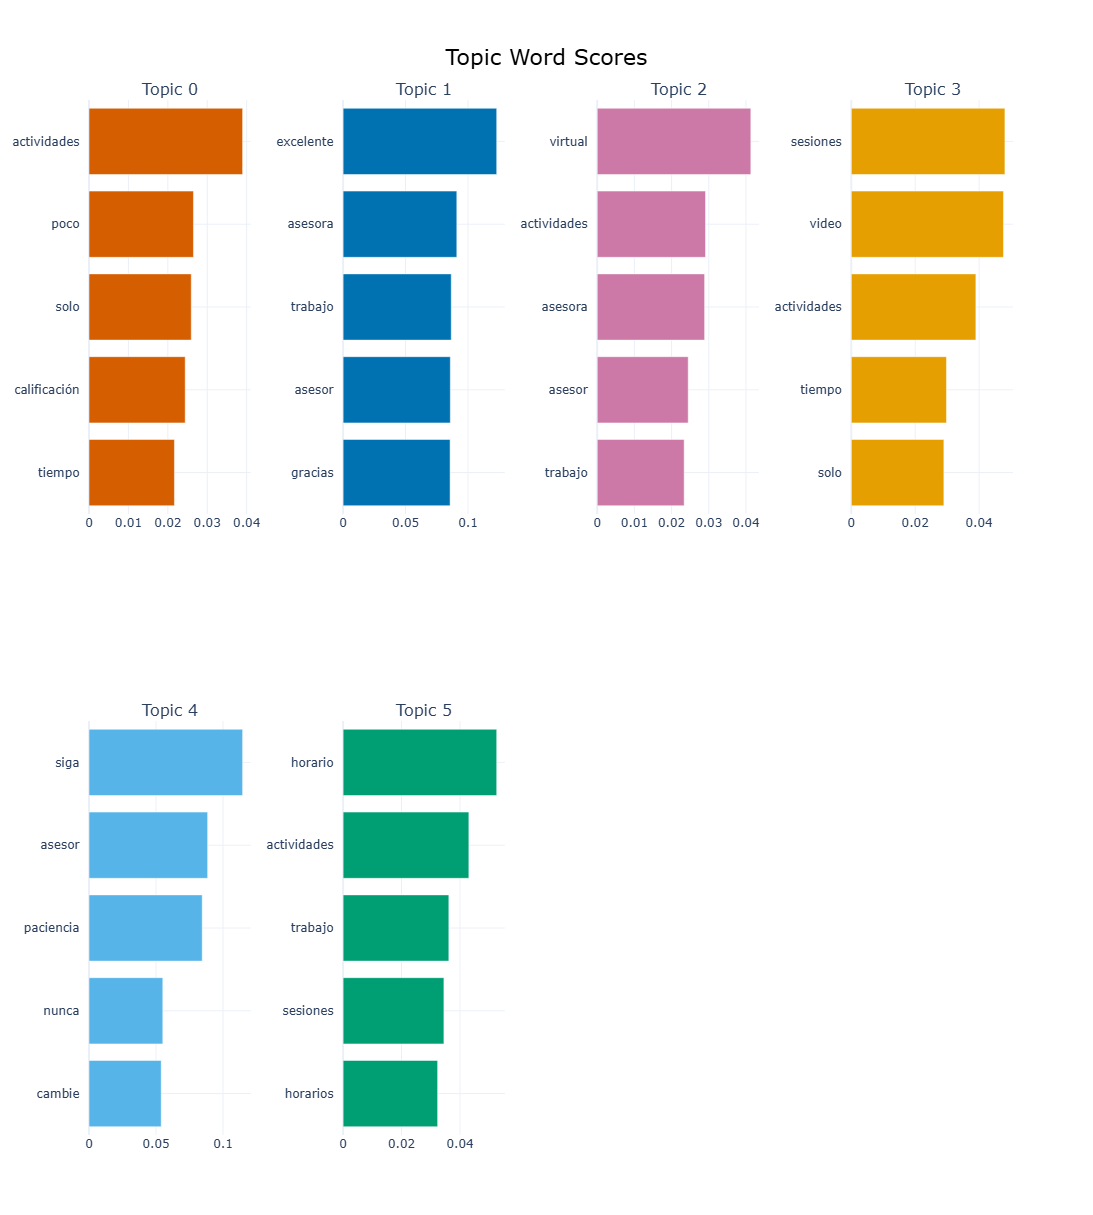

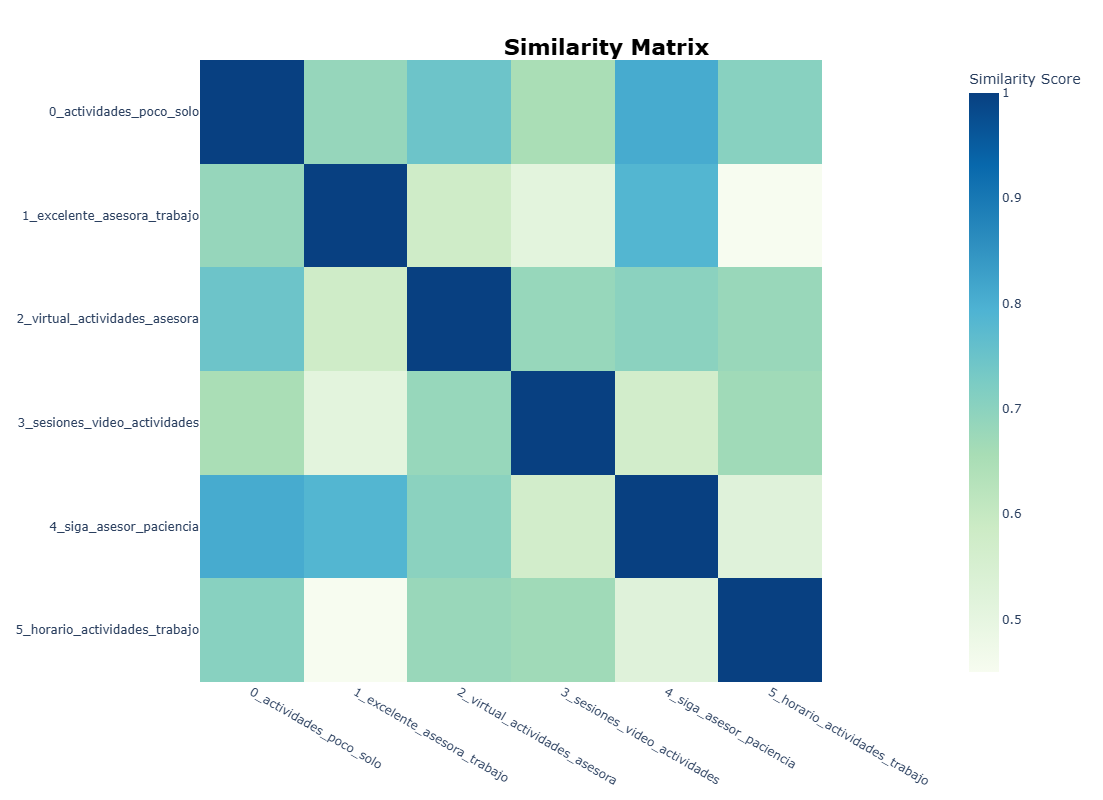

In [2]:
import pandas as pd
import re
import string
from bertopic import BERTopic
from umap import UMAP
import hdbscan
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

# --- Configuración inicial ---
MODULO = "M14"  # Define el módulo a analizar
RUTA_ARCHIVO = 'datos_combinados 2024.xlsx'

# --- 1. Carga y filtrado por módulo ---
df = pd.read_excel(RUTA_ARCHIVO)
df_modulo = df[df['Grupo'].str.contains(f"{MODULO}C", na=False)].copy()  # Filtra solo el módulo 14

# --- 2. Limpieza de texto ---
#stopwords_personalizadas = set(['que', 'y', 'de', 'la', 'el', 'en', 'los', 'las', 'un', 'una', 'con', 'por', 'para', 'es'])

# --- Lista de stopwords personalizada ---
stopwords_personalizadas = set([
    'que', 'y', 'de', 'la', 'el', 'en', 'los', 'las', 'un', 'una', 'con', 'por', 'para',
    'es', 'al', 'del', 'se', 'lo', 'su', 'más', 'pero', 'no', 'muy', 'como', 'le', 'ha',
    'me', 'si', 'o', 'ya', 'todo', 'también', 'muy', 'sin', 'sobre', 'este', 'esta',
    'son', 'fue', 'ser', 'han', 'sus', 'gracias', 'mi', 'mucho', 'mis', 'nos', 'muchas', 
    'siempre', 'bien', 'agradezco', 'buenas', 'gran','usted', 'mas', 'así', 'e', 'a'
])

def limpiar_texto(texto):
    texto = re.sub(r'\s+', ' ', str(texto))  # Elimina espacios extras
    texto = texto.translate(str.maketrans('', '', string.punctuation))  # Elimina puntuación
    texto = ' '.join([pal for pal in texto.split() if pal not in stopwords_personalizadas])  # Stopwords
    return texto.lower().strip()

df_modulo['Sugerencias_limpias'] = df_modulo['Sugerencias'].apply(limpiar_texto)
df_modulo = df_modulo[df_modulo['Sugerencias_limpias'].str.len() > 10]  # Filtra textos muy cortos

# --- 3. Clusterización con BERTopic y HDBSCAN ---
umap_model = UMAP(n_neighbors=15, n_components=5, metric='cosine', random_state=42)

hdbscan_model = hdbscan.HDBSCAN(
    min_cluster_size=10,
    metric='euclidean',
    cluster_selection_method='eom',
    prediction_data=True  # ¡Esto es clave!
)

# Modelo BERTopic con personalización
modelo = BERTopic(
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    min_topic_size=10,
    language='spanish',
    calculate_probabilities=True,
    verbose=True
)

# Entrenamiento
temas, probabilidades = modelo.fit_transform(df_modulo['Sugerencias_limpias'].tolist())

# --- 4. Análisis de clusters/temas ---
# a) Resumen de temas
topic_info = modelo.get_topic_info()
print("Resumen de temas identificados:")
print(topic_info)

# b) Visualización de clusters (2D)
fig_clusters = modelo.visualize_documents(
    df_modulo['Sugerencias_limpias'].tolist(),
    topics=temas,
    width=1200,
    height=800,
    title=f"Distribución de Clusters (Módulo {MODULO})"
)
fig_clusters.show()

# c) Términos clave por cluster
print("\nTérminos clave por tema:")
for topic_id in topic_info['Topic'].unique():
    if topic_id != -1:  # Excluye outliers
        print(f"Tema {topic_id}: {modelo.get_topic(topic_id)[:5]}")  # Top 5 palabras

# --- 5. Análisis complementario (Frecuencia y coherencia) ---
# a) Frecuencia de temas
fig_frecuencia = modelo.visualize_barchart(top_n_topics=10, width=1200, height=600)
fig_frecuencia.show()

# b) Heatmap de similitud entre temas
fig_heatmap = modelo.visualize_heatmap(width=1000, height=800)
fig_heatmap.show()

# --- 6. Exportar resultados ---
df_resultados = pd.DataFrame({
    'Texto_original': df_modulo['Sugerencias'],
    'Texto_limpio': df_modulo['Sugerencias_limpias'],
    'Cluster': temas,
    'Probabilidad': np.max(probabilidades, axis=1)
})

df_resultados.to_excel(f"resultados_clusterizacion_modulo_{MODULO}.xlsx", index=False)

In [3]:
# --- 4. Análisis de clusters/temas ---
# a) Resumen de temas
topic_info = modelo.get_topic_info()
print("Resumen de temas identificados:")
print(topic_info)

Resumen de temas identificados:
   Topic  Count                                    Name  \
0     -1    241  -1_actividades_asesora_sesiones_tiempo   
1      0    135    0_actividades_poco_solo_calificación   
2      1     77      1_excelente_asesora_trabajo_asesor   
3      2     35    2_virtual_actividades_asesora_asesor   
4      3     21     3_sesiones_video_actividades_tiempo   
5      4     21           4_siga_asesor_paciencia_nunca   
6      5     14  5_horario_actividades_trabajo_sesiones   

                                      Representation  \
0  [actividades, asesora, sesiones, tiempo, que, ...   
1  [actividades, poco, solo, calificación, tiempo...   
2  [excelente, asesora, trabajo, asesor, gracias,...   
3  [virtual, actividades, asesora, asesor, trabaj...   
4  [sesiones, video, actividades, tiempo, solo, d...   
5  [siga, asesor, paciencia, nunca, cambie, buena...   
6  [horario, actividades, trabajo, sesiones, hora...   

                                 Representativ

In [11]:
fig.write_html("clusters.html")  # Abre este archivo en tu navegador

# Analisis detallado del modulo 14 en los años 2024 y 2025

In [10]:
# Cargar los datos y filtrar los coentarios con 1 y 2 estrellas

import pandas as pd
import ast

# Función robusta para extraer estrellas
def extraer_estrellas(valor):
    try:
        if pd.isna(valor):
            return None
        if isinstance(valor, str) and valor.startswith("{"):
            d = ast.literal_eval(valor)
            return d.get('label', None)
        elif isinstance(valor, dict):
            return valor.get('label', None)
        return valor
    except Exception as e:
        print(f"Error procesando valor: {valor} - Error: {str(e)}")
        return None

# Clasificación precisa
def clasificar_sentimiento(estrellas):
    if estrellas in ['5 stars', '4 stars']:
        return 'positivo'
    elif estrellas == '3 stars':
        return 'neutral'
    elif estrellas in ['2 stars', '1 star']:
        return 'negativo'
    return 'otros'

# Función para cargar y filtrar un archivo
def cargar_y_filtrar(nombre_archivo):
    df = pd.read_excel(nombre_archivo)
    
    # Extraer número de módulo
    df['Modulo'] = df['Grupo'].str.extract(r'M(\d+)').astype(int)
    
    # Extraer estrellas
    df['Estrellas'] = df['Sentimiento_Sugerencias'].apply(extraer_estrellas)
    
    # Clasificar sentimiento
    df['Clasificacion'] = df['Estrellas'].apply(clasificar_sentimiento)
    
    # Filtrar comentarios con 1 y 2 estrellas (negativos)
    df_negativos = df[df['Clasificacion'] == 'negativo'].copy()
    
    return df_negativos

# Cargar y filtrar ambos archivos
archivo_2024 = 'resultados_sentimiento_Sugerencias 2024.xlsx'
archivo_2025 = 'resultados_sentimiento_Sugerencias 2025.xlsx'

df_neg_2024 = cargar_y_filtrar(archivo_2024)
df_neg_2025 = cargar_y_filtrar(archivo_2025)

# Concatenar resultados
df_negativos = pd.concat([df_neg_2024, df_neg_2025], ignore_index=True)

# Guardar en nuevo archivo Excel
df_negativos.to_excel('Modulo14.xlsx', index=False)

# Imprimir cantidad de comentarios negativos extraídos
print(f"Comentarios negativos extraídos de 2024: {len(df_neg_2024)}")
print(f"Comentarios negativos extraídos de 2025: {len(df_neg_2025)}")
print(f"Total comentarios negativos combinados: {len(df_negativos)}")

# Mostrar una muestra aleatoria de 10 comentarios negativos
print("\nMuestra de comentarios negativos:")
print(df_negativos.sample(10))


Comentarios negativos extraídos de 2024: 4348
Comentarios negativos extraídos de 2025: 1512
Total comentarios negativos combinados: 5860

Muestra de comentarios negativos:
             Grupo                                     Felicitaciones  \
5713   M0C2G75-072  agarrada forma trabajar asesor brindado inform...   
5856   M0C3G77-187  estoy contenta asesora virtual toco resuelve t...   
4978  M10C1G64-007  verdad asesor virtual módulo respetuoso califi...   
2077  M13C2G56-057  tardes asesora virtual maría amparo león garza...   
1795  M11C2G54-033  felicidades asesor ayudo bastante herramientas...   
4725  M15C2G57-032  hasta ahora asesora apoyo antes nada paciencia...   
1409  M16C1G50-011  retroalimentación todas actividades brindarme ...   
4315   M0C1G72-031  dio gusto desempeño contesto cada duda tuve ca...   
1306  M16C2G49-030  pues felicito porque actividades explica logro...   
479   M14C2G42-042  ayudo explicaciones cada sesión poder trabajar...   

                        

In [11]:
import pandas as pd
import ast

# Definir módulo a analizar
MODULO = "M14"

# Función robusta para extraer estrellas
def extraer_estrellas(valor):
    try:
        if pd.isna(valor):
            return None
        if isinstance(valor, str) and valor.startswith("{"):
            d = ast.literal_eval(valor)
            return d.get('label', None)
        elif isinstance(valor, dict):
            return valor.get('label', None)
        return valor
    except Exception as e:
        print(f"Error procesando valor: {valor} - Error: {str(e)}")
        return None

# Clasificación precisa
def clasificar_sentimiento(estrellas):
    if estrellas in ['5 stars', '4 stars']:
        return 'positivo'
    elif estrellas == '3 stars':
        return 'neutral'
    elif estrellas in ['2 stars', '1 star']:
        return 'negativo'
    return 'otros'

# Función para cargar, filtrar por módulo y filtrar negativos
def cargar_y_filtrar_modulo(nombre_archivo, modulo):
    df = pd.read_excel(nombre_archivo)
    
    # Filtrar solo el módulo 14 (o el definido)
    df_modulo = df[df['Grupo'].str.contains(f"{modulo}C", na=False)].copy()
    
    # Extraer estrellas
    df_modulo['Estrellas'] = df_modulo['Sentimiento_Sugerencias'].apply(extraer_estrellas)
    
    # Clasificar sentimiento
    df_modulo['Clasificacion'] = df_modulo['Estrellas'].apply(clasificar_sentimiento)
    
    # Filtrar comentarios con 1 y 2 estrellas (negativos)
    df_negativos = df_modulo[df_modulo['Clasificacion'] == 'negativo'].copy()
    
    return df_negativos

# Archivos a procesar
archivo_2024 = 'resultados_sentimiento_Sugerencias 2024.xlsx'
archivo_2025 = 'resultados_sentimiento_Sugerencias 2025.xlsx'

# Cargar y filtrar módulo 14 negativo
df_neg_2024 = cargar_y_filtrar_modulo(archivo_2024, MODULO)
df_neg_2025 = cargar_y_filtrar_modulo(archivo_2025, MODULO)

# Concatenar resultados
df_negativos = pd.concat([df_neg_2024, df_neg_2025], ignore_index=True)

# Guardar en nuevo archivo Excel
df_negativos.to_excel('Modulo14.xlsx', index=False)

# Imprimir cantidad de comentarios negativos extraídos
print(f"Comentarios negativos extraídos de 2024 (Módulo 14): {len(df_neg_2024)}")
print(f"Comentarios negativos extraídos de 2025 (Módulo 14): {len(df_neg_2025)}")
print(f"Total comentarios negativos combinados (Módulo 14): {len(df_negativos)}")

# Mostrar una muestra aleatoria de 10 comentarios negativos
print("\nMuestra de comentarios negativos del Módulo 14:")
print(df_negativos.sample(min(10, len(df_negativos))))


Comentarios negativos extraídos de 2024 (Módulo 14): 216
Comentarios negativos extraídos de 2025 (Módulo 14): 69
Total comentarios negativos combinados (Módulo 14): 285

Muestra de comentarios negativos del Módulo 14:
            Grupo                                     Felicitaciones  \
232  M14C1G56-012  ninguno hola noches respecto aspectos asesora ...   
126  M14C2G48-025  hizo quiero agradecer asesor virtual excelente...   
244  M14C1G57-001  sinceridad apoyo esfuerzo realizó asesor ademá...   
282  M14C2G59-048  agradecerle explicación tan clara tiene moment...   
94   M14C1G46-023  manera explicar temas fácil realzar actividade...   
38   M14C1G44-002  gusto método enseñanza insistencia colocaremos...   
198  M14C1G54-001  prestaba mucha atencion desarollo neustro cono...   
248  M14C1G57-015  deseo agradecer esfuerzo dado estos días servi...   
206  M14C1G54-026  enseñanzas respeto tiempo asesora xochitl pers...   
31   M14C2G43-041  porque uno esfuerza trabajos valoran ese es

# Analisis tematico de los comentarios negativos del modulo 14 de los años 2024 y 2025

In [24]:
import pandas as pd
import re
import string
from bertopic import BERTopic
from umap import UMAP
import hdbscan
import time

inicio = time.time()

# --- Funciones de limpieza ---
def limpiar_espacios(texto):
    return re.sub(r'\s+', ' ', texto)

def eliminar_puntuacion(texto):
    return texto.translate(str.maketrans('', '', string.punctuation))

def eliminar_stopwords(texto, stopwords):
    palabras = texto.split()
    palabras_filtradas = [pal for pal in palabras if pal not in stopwords]
    return ' '.join(palabras_filtradas)

# --- Lista de stopwords personalizada ---
stopwords_personalizadas = set([
    'que', 'y', 'de', 'la', 'el', 'en', 'los', 'las', 'un', 'una', 'con', 'por', 'para',
    'es', 'al', 'del', 'se', 'lo', 'su', 'más', 'pero', 'no', 'muy', 'como', 'le', 'ha',
    'me', 'si', 'o', 'ya', 'todo', 'también', 'muy', 'sin', 'sobre', 'este', 'esta',
    'son', 'fue', 'ser', 'han', 'sus', 'gracias', 'mi', 'mucho', 'mis', 'nos', 'muchas', 
    'siempre', 'bien', 'agradezco', 'buenas', 'gran','usted', 'mas', 'así', 'e', 'a'
])

# --- Función segmentar textos mejorada ---
def segmentar_textos(textos, max_longitud=500, min_longitud=10):
    fragmentos = []
    for texto in textos:
        start = 0
        while start < len(texto):
            end = start + max_longitud
            if end < len(texto):
                espacio = texto.rfind(' ', start, end)
                if espacio == -1 or espacio <= start:
                    espacio = end
                fragmento = texto[start:espacio].strip()
                if len(fragmento) >= min_longitud:
                    fragmentos.append(fragmento)
                start = espacio
            else:
                fragmento = texto[start:].strip()
                if len(fragmento) >= min_longitud:
                    fragmentos.append(fragmento)
                break
    return fragmentos

# --- Función para eliminar palabras muy cortas ---
def eliminar_palabras_cortas(texto, min_longitud=3):
    palabras = texto.split()
    palabras_filtradas = [pal for pal in palabras if len(pal) >= min_longitud]
    return ' '.join(palabras_filtradas)

# --- Limpieza y preprocesamiento ---
for col in ['Felicitaciones', 'Sugerencias']:
    df[col] = df[col].fillna('').astype(str)
    df[col] = df[col].str.replace('-', ' ', regex=False)
    df[col] = df[col].str.strip()
    df[col] = df[col].str.lower()
    df[col] = df[col].apply(limpiar_espacios)
    df[col] = df[col].apply(eliminar_puntuacion)
    df[col] = df[col].apply(lambda texto: eliminar_stopwords(texto, stopwords_personalizadas))
    df[col] = df[col].apply(eliminar_palabras_cortas)

# --- Filtrar textos cortos antes de segmentar ---
df = df[df['Sugerencias'].str.len() > 10].copy()

# --- Segmentar textos ---
comentarios_segmentados = segmentar_textos(df['Sugerencias'].tolist(), max_longitud=500, min_longitud=10)

# --- Filtrar fragmentos cortos después de segmentar ---
comentarios_segmentados = [frag for frag in comentarios_segmentados if len(frag) > 10 and len(frag.split()) > 2]

# Continuar con UMAP, HDBSCAN y BERTopic como antes...

# ---------- Configurar UMAP y HDBSCAN ----------
umap_model = UMAP(n_neighbors=10, n_components=5, metric='cosine', random_state=42)
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=5, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

# ---------- Crear y entrenar modelo BERTopic ----------
modelo = BERTopic(
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    calculate_probabilities=True,
    min_topic_size=5,
    verbose=True
)

temas, probabilidades = modelo.fit_transform(comentarios_segmentados)

# --- Mostrar resumen de temas ---
print(f"Análisis para el módulo {modulo_a_analizar}:")
print(modelo.get_topic_info())


fin = time.time()

print(f"Tiempo de ejecución: {fin - inicio} segundos")

2025-07-10 16:48:36,555 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/15 [00:00<?, ?it/s]

2025-07-10 16:49:09,815 - BERTopic - Embedding - Completed ✓
2025-07-10 16:49:09,817 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-07-10 16:49:11,022 - BERTopic - Dimensionality - Completed ✓
2025-07-10 16:49:11,024 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-07-10 16:49:11,104 - BERTopic - Cluster - Completed ✓
2025-07-10 16:49:11,126 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-07-10 16:49:11,243 - BERTopic - Representation - Completed ✓


Análisis para el módulo M14:
    Topic  Count                                               Name  \
0      -1    118                 -1_actividades_tiempo_asesora_solo   
1       0     66            0_actividades_tiempo_actividad_realizar   
2       1     37                      1_video_videos_sesiones_sesin   
3       2     34                    2_trabajo_personas_caso_tenemos   
4       3     30         3_plagio_referencias_actividades_actividad   
5       4     18                        4_rbrica_rubricas_cada_pide   
6       5     16                    5_nada_cambiar_ninguna_perfecto   
7       6     16                        6_sea_quizs_est_actividades   
8       7     14              7_informacin_puntos_referencias_temas   
9       8     14      8_calificaciones_calificacin_calificada_hacer   
10      9     13                  9_internet_correo_fallas_extensin   
11     10     12                  10_tenemos_mayora_cumplir_horario   
12     11     11  11_retroalimentaciones_retroal

# Explorar los temas

In [48]:
def mostrar_textos_por_tema_con_palabras(modelo, tema_id, temas, textos_segmentados, n=10):
    """
    Muestra hasta n textos correspondientes al tema elegido y las palabras clave del tema.

    Args:
        modelo: objeto BERTopic entrenado.
        tema_id (int): ID del tema que quieres explorar.
        temas (list/array): Lista con la asignación de tema para cada texto.
        textos_segmentados (list): Lista con los textos segmentados originales.
        n (int): Número máximo de textos a mostrar.
    """
    # Obtener palabras clave del tema (solo las palabras, sin pesos)
    palabras_clave = [palabra for palabra, peso in modelo.get_topic(tema_id)]
    if not palabras_clave:
        print(f"No se encontraron palabras clave para el tema {tema_id}.")
    else:
        print(f"\nPalabras clave del Tema {tema_id}: {', '.join(palabras_clave)}")

    # Filtrar textos que pertenecen al tema seleccionado
    textos_del_tema = [texto for texto, t in zip(textos_segmentados, temas) if t == tema_id]

    if not textos_del_tema:
        print(f"No se encontraron textos para el tema {tema_id}.")
        return

    print(f"\nMostrando {min(n, len(textos_del_tema))} textos del Tema {tema_id}:\n")
    for i, texto in enumerate(textos_del_tema[:n], 1):
        print(f"{i}. {texto[:300]}{'...' if len(texto) > 300 else ''}\n{'-'*80}")

# Ejemplo de uso:
tema_elegido = int(input("Ingresa el ID del tema que quieres explorar: "))
mostrar_textos_por_tema_con_palabras(modelo, tema_elegido, temas, comentarios_segmentados, n=16)


Ingresa el ID del tema que quieres explorar:  10



Palabras clave del Tema 10: tenemos, mayora, cumplir, horario, horarios, quienes, estudiantes, porque, comprender, mayor

Mostrando 12 textos del Tema 10:

1. compañeros pasan situaciones dificiles solo pediria mayor apertura criterio evaluaciones saludos
--------------------------------------------------------------------------------
2. podrían estar preparadas ¡nos aburrimos tal vez podría empática estudiantes generalmente salimos secundaria hace muchos años horarios sesiones fueron variados parece respetó encuesta mayoría nosotros trabajamos fueron horarios trabajo muchos grabaciones tan quizá pueda mejorar imagen sonido sólo exp...
--------------------------------------------------------------------------------
3. sesiones vivo sean horario puedan acoplar mayoría estudiantes ejemplo tardes módulo sesiones fueron horarios tempranos pude entrar casi ninguna vez personalmente tengo ninguna sugerencia solo agradecer compartir conocimientos hola asesora gustaría clases fueran tarde hor

## Visualizador de temas Modulo 14

In [49]:
import json

# Supongamos que tienes dos listas:
# comentarios_segmentados: lista de textos segmentados
# temas: lista de IDs de tema asignados a cada texto (misma longitud que comentarios_segmentados)

# Agrupar textos por tema
from collections import defaultdict
texts_by_topic = defaultdict(list)
for texto, tema in zip(comentarios_segmentados, temas):
    texts_by_topic[str(tema)].append(texto)

# Convertir a JSON para insertar en HTML
texts_by_topic_json = json.dumps(texts_by_topic, ensure_ascii=False)

# Plantilla HTML básica con selector y área para mostrar textos
html_template = f"""
<!DOCTYPE html>
<html lang="es">
<head>
<meta charset="UTF-8" />
<title>Visualizador de Textos por Tópico</title>
<style>
  body {{ font-family: Arial, sans-serif; margin: 20px; }}
  #textsContainer {{ margin-top: 20px; max-height: 400px; overflow-y: auto; border: 1px solid #ccc; padding: 10px; background: #f9f9f9; white-space: pre-wrap; }}
</style>
</head>
<body>

<h2>Selecciona un tópico para ver sus textos</h2>

<select id="topicSelect">
  <option value="">-- Selecciona un tópico --</option>
</select>

<div id="textsContainer">Aquí se mostrarán los textos del tópico seleccionado.</div>

<script>
const textsByTopic = {texts_by_topic_json};

const select = document.getElementById('topicSelect');
const container = document.getElementById('textsContainer');

// Cargar opciones en el selector
for (const topicId in textsByTopic) {{
  const option = document.createElement('option');
  option.value = topicId;
  option.textContent = `Tópico ${{topicId}} (${{textsByTopic[topicId].length}} textos)`;
  select.appendChild(option);
}}

// Mostrar textos al seleccionar un tópico
select.addEventListener('change', () => {{
  const selected = select.value;
  container.innerHTML = '';
  if (!selected || !textsByTopic[selected]) {{
    container.textContent = 'Aquí se mostrarán los textos del tópico seleccionado.';
    return;
  }}
  textsByTopic[selected].forEach((texto, i) => {{
    const p = document.createElement('p');
    p.textContent = `${{i + 1}}. ${{texto}}`;
    container.appendChild(p);
  }});
}});
</script>

</body>
</html>
"""

# Guardar el HTML en un archivo
with open("visualizador_temas_Modulo_14.html", "w", encoding="utf-8") as f:
    f.write(html_template)

print("Archivo 'visualizador_temas.html' generado. Ábrelo en un navegador para usarlo.")


Archivo 'visualizador_temas.html' generado. Ábrelo en un navegador para usarlo.
